### Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [2]:
from pyforest import *

In [3]:
train = pd.read_csv("~/Downloads/ML with R Programming/Big Mart SalesTrain_UWu5bXk.csv")
test = pd.read_csv("~/Downloads/ML with R Programming/Big Mart SalesTest_u94Q5KV.csv")

In [4]:
# Preview First 05 Rows of the Data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


### Steps to Modelling

1. Problem Statement

2. Hypothesis Generation

3. Exploratory Data Analysis

3.1. Univariate Analysis

3.2. Bivariate or Multivariate Analysis

3.3. Missing Values Treatment

3.4. Outlier Identification

3.5. Feature Engineering

3.6. Standardization - This is the last Step of EDA popularly known as Data Pre-Processing Step.

4. Applying Machine Learning Models

### Exploratory Data Analysis

1. Univariate Analysis

The columns in the dataset are either Numerical or categorical.

For Numerical Columns - Create a Histogram | Distplot

Histogram is a Statistical Plot that tells me how is the Data Being Distrib uted. If it is not normal (Bell Shaped), then it would be skewed.

For Categorical Column, we create a BARPLOT/Frequency/Count Plot


In [6]:
# Target Variable
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
sns.distplot(train.Item_Outlet_Sales, color = "m")
plt.show()

# Sales is +vely Skewed

<Figure size 640x480 with 1 Axes>

In [8]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

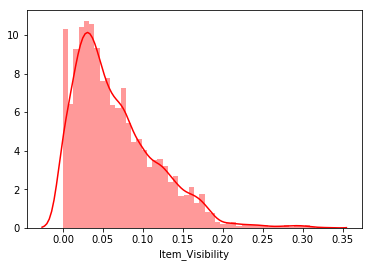

In [9]:
sns.distplot(train.Item_Visibility, color = "red")
# Visibility is Higher for lot of Items.

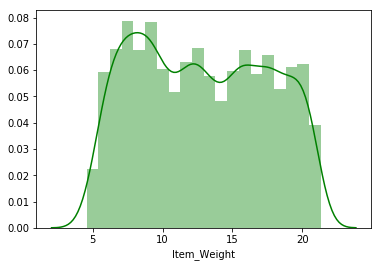

In [10]:
sns.distplot(train.Item_Weight.dropna(), color = "g")

# Not much of a Pattern - Needs Exploring

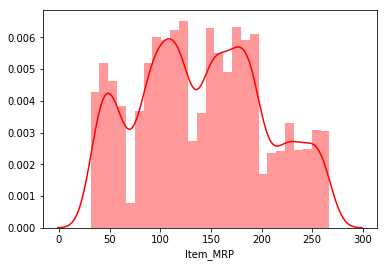

In [11]:
sns.distplot(train.Item_MRP, color = "r")
# MRP appears to have 04 diff dist/values. Needs exploring

In [12]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [14]:
test.Item_Fat_Content.replace(to_replace = ["LF", "low fat"], 
                              value = ["Low Fat", "Low Fat"], inplace=True)
test.Item_Fat_Content.replace(to_replace = ["reg"], value = ["Regular"], 
                              inplace = True)

In [15]:
# Replacement of LF and low fat
train.Item_Fat_Content.replace(to_replace = ["LF", "low fat"], 
                              value = ["Low Fat", "Low Fat"], inplace=True)

In [16]:
# Replacing reg into Regular
train.Item_Fat_Content.replace(to_replace = ["reg"], value = ["Regular"], 
                              inplace = True)

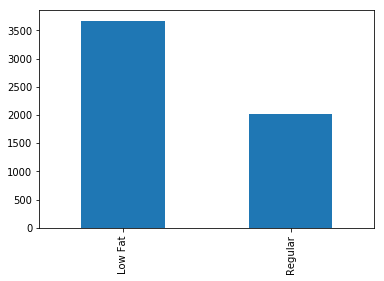

In [17]:
# Item Fat Content
test.Item_Fat_Content.value_counts().plot(kind = "bar")
plt.show()

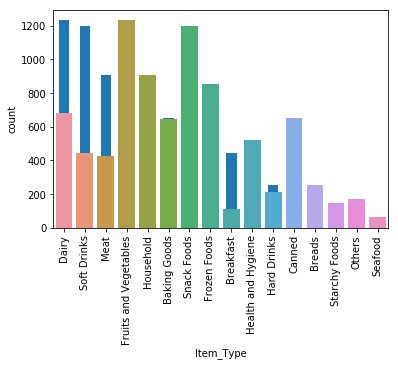

In [18]:
# Item Fat Content
train.Item_Type.value_counts().plot(kind = "bar")

# By Sns
sns.countplot(x = "Item_Type", data = train)
plt.xticks(rotation = 90)
plt.show()

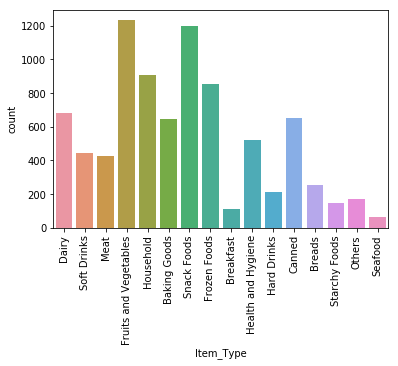

In [19]:
sns.countplot(x = "Item_Type", data = train)
plt.xticks(rotation = 90)
plt.show()

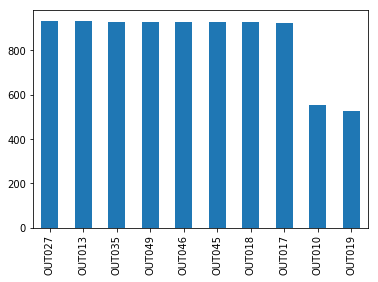

In [20]:
# Outlet _Identifier
train.Outlet_Identifier.value_counts().plot(kind = "bar")

# Less Frequency Count is of OUT10 and OUT19

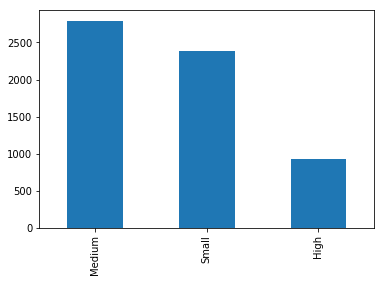

In [21]:
# Outlet _Size
train.Outlet_Size.value_counts().plot(kind = "bar")

# Medium Outlets are the most visible outlets

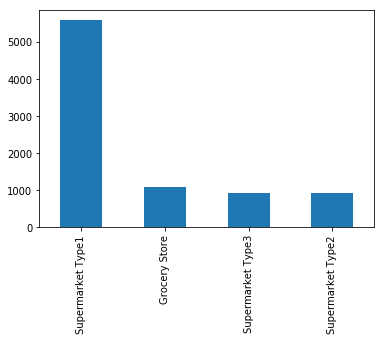

In [22]:
# Outlet_Type
train.Outlet_Type.value_counts().plot(kind = "bar")

# Most of the Outlet Types are S

### Bivariate Analysis

1. Num vs Num - Scatterplot

2. Cat Vs Num - Boxplot (Statistical Plot) | Violin Plot

3. Cat Vs Cat - pd.crosstab | Table - Frequency

In [23]:
# Num vs Num
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


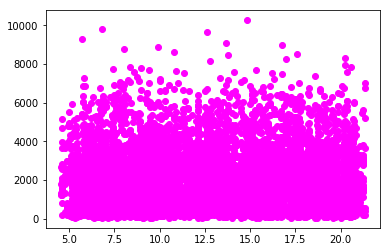

In [24]:
plt.scatter(train.Item_Weight, train.Item_Outlet_Sales, color = "magenta")

# No pattern as such between the duo

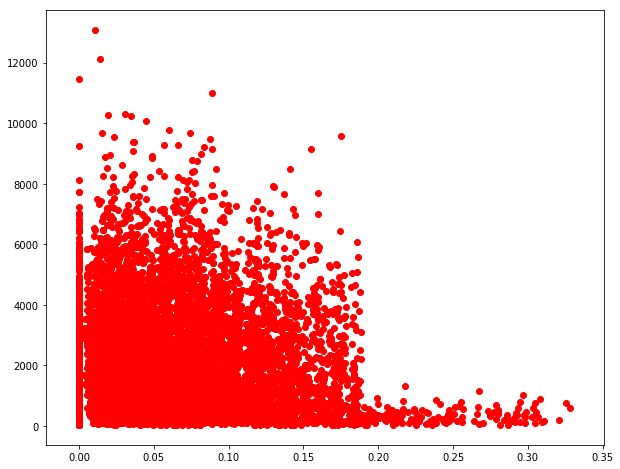

In [25]:
plt.figure(figsize = [10, 8])
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color = "red")

# :Lots of 0s in Visibility for which the sales exist.

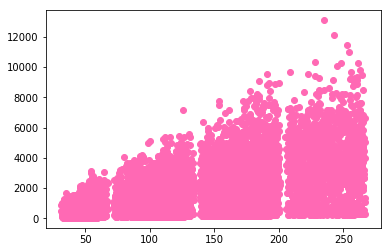

In [26]:
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, color = "hotpink")
# Price Per Unit

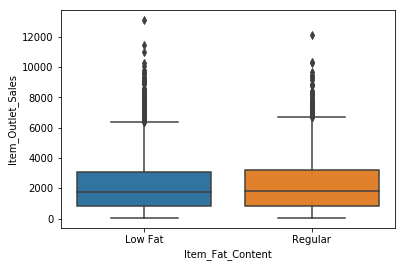

In [27]:
# Cat Vs Numerical
sns.boxplot(train.Item_Fat_Content, train.Item_Outlet_Sales)

In [28]:
train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe().T
# Hint: Refer Empirical Rule and Contradictory Rule - Chebyshev Inequality

Item_Fat_Content,Low Fat,Regular
count,5517.000000,3006.000000
mean,2157.711534,2224.561170
std,1697.973824,1721.480865
min,33.290000,33.955800
25%,826.257800,857.550400
50%,1765.035800,1844.598900
75%,3050.695600,3198.669650
max,13086.964800,12117.560000


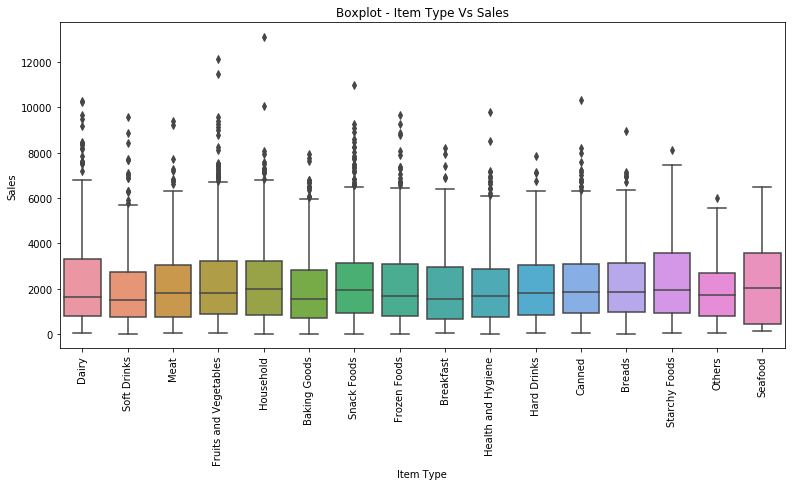

In [29]:
# Cat Vs Numerical
plt.figure(figsize = [13,6])
sns.boxplot(train.Item_Type, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Item Type Vs Sales")
plt.xlabel("Item Type")
plt.ylabel("Sales")
plt.show()

# Hint = Refer ANOVA

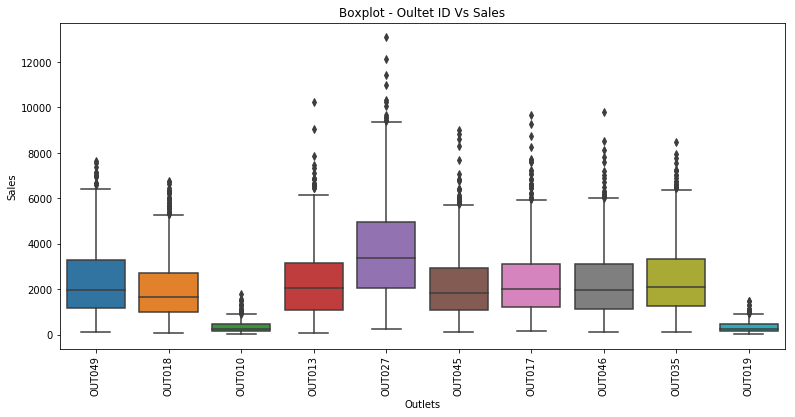

In [30]:
# Cat Vs Numerical
plt.figure(figsize = [13,6])
sns.boxplot(train.Outlet_Identifier, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Oultet ID Vs Sales")
plt.xlabel("Outlets")
plt.ylabel("Sales")
plt.show()

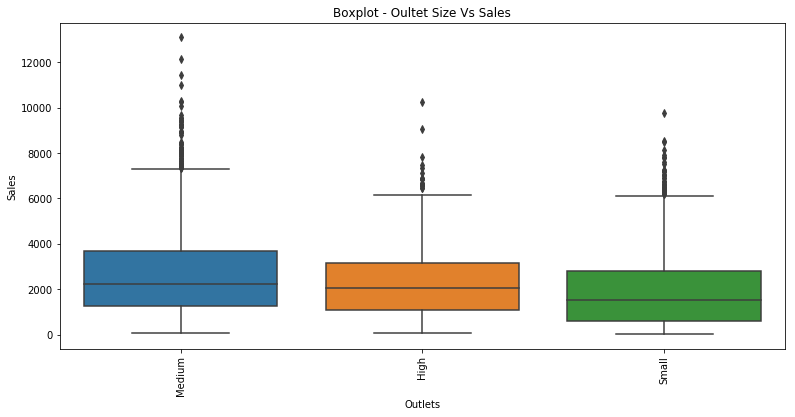

In [31]:
# Outlet Size
# Cat Vs Numerical
plt.figure(figsize = [13,6])
sns.boxplot(train.Outlet_Size, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Oultet Size Vs Sales")
plt.xlabel("Outlets")
plt.ylabel("Sales")
plt.show()

In [32]:
pd.DataFrame(train.groupby("Outlet_Size")["Outlet_Identifier"].value_counts()).T

Outlet_Size         High Medium                Small              
Outlet_Identifier OUT013 OUT027 OUT049 OUT018 OUT035 OUT046 OUT019
Outlet_Identifier    932    935    930    928    930    930    528

In [33]:
# Missing Value
train.isnull().sum()[train.isnull().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [34]:
weightna = train[train.Item_Weight.isnull()]

In [35]:
weightna.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [36]:
# Combining the Dataset
combined = pd.concat([train,test], ignore_index=True, sort = False)

In [37]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [38]:
combined.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [39]:
# Pattern
train[train.Item_Identifier=="FDX07"]["Item_Visibility"].median()

# Missing value Imputation
train.loc[29, "Item_Weight"]=
train[train.Item_Identifier=="FDC14"]["Item_Weight"].median()

# Finding ID | np.where(train.Item_Weight.isna())
ids = train[pd.isnull(train.Item_Weight)]["Item_Identifier"]
locs = ids.index # Finding Index of the Item Weight Missing Values

# Missing Value Final Code
for i in range(0, len(ids)):
    train.loc[locs[i],"Item_Weight"]=
    train[train.Item_Identifier==ids.values[i]]["Item_Weight"].median()

SyntaxError: invalid syntax (<ipython-input-39-528ca5d50ecc>, line 5)

In [40]:
# Missing Value Imputation - Item Weight | Lambda
combined["Item_Weight"]=combined.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.median()))

In [41]:
# Missing Values - Item Visibility
combined["Item_Visibility"] = combined.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(to_replace = 0,value = x.median()))

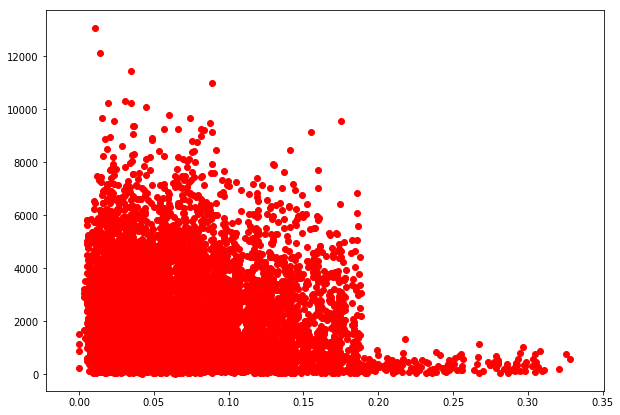

In [42]:
plt.figure(figsize = [10,7])
plt.scatter(combined["Item_Visibility"], combined["Item_Outlet_Sales"], color = "red")

In [43]:
combined[combined["Item_Identifier"]=="FDY07"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
10,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
651,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,46.5402,OUT010,1998,NaN,Tier 3,Grocery Store,229.7010
779,FDY07,11.8,Low Fat,0.121848,Fruits and Vegetables,46.8402,OUT045,2002,NaN,Tier 2,Supermarket Type1,597.2226
3370,FDY07,11.8,Low Fat,0.122290,Fruits and Vegetables,46.3402,OUT017,2007,NaN,Tier 2,Supermarket Type1,275.6412
4208,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.9402,OUT027,1985,Medium,Tier 3,Supermarket Type3,872.8638
4791,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.2402,OUT018,2009,Medium,Tier 3,Supermarket Type2,1148.5050
6321,FDY07,11.8,Low Fat,0.121501,Fruits and Vegetables,46.8402,OUT013,1987,High,Tier 3,Supermarket Type1,413.4618
12966,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,44.1402,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
13259,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN


In [44]:
# Item Visibility of Low Fat and Fruits and Veggies
combined[(combined.Item_Fat_Content=="Low Fat") & 
         (combined.Item_Type=="Fruits and Vegetables")]["Item_Visibility"].median()

0.055143276500000005

In [45]:
# Imputation of FDY 07
combined.loc[combined.Item_Visibility==0, "Item_Visibility"]=0.0551432765

In [46]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [47]:
# Lets Deal with Tier 2
train.loc[train["Outlet_Location_Type"]=='Tier 2',"Outlet_Size"]="Small"

In [48]:
#train.loc[train["Outlet_Location_Type"]=='Tier 1',"Outlet_Size"]

In [49]:
# Feature Engineering
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
# Size
pd.DataFrame(combined.groupby(["Outlet_Type", "Outlet_Location_Type"])
             ["Outlet_Size"].value_counts())

Outlet_Size
Outlet_Type       Outlet_Location_Type Outlet_Size             
Grocery Store     Tier 1               Small                880
Supermarket Type1 Tier 1               Medium              1550
                                       Small               1550
                  Tier 2               Small               1550
                  Tier 3               High                1553
Supermarket Type2 Tier 3               Medium              1546
Supermarket Type3 Tier 3               Medium              1559

Rule

1. Tier 3 and Grocery Store - Medium
2. Tier 2 and S1 - Small

When Outlet Size is NA, then the Locations are Tier 2 and Tier 3 and 'Grocery Store', 'Supermarket Type1'

In [51]:
# Imputting Rule 2 Tier 2 and S1 - Small
combined.loc[(combined["Outlet_Location_Type"]=="Tier 2") & 
             (combined["Outlet_Type"]=="Supermarket Type1"),
            "Outlet_Size"]=["Small"]

In [52]:
# Imputting Rule 1 Tier 3 and Grocery Store - Medium
combined.loc[(combined["Outlet_Location_Type"]=="Tier 3") & 
             (combined["Outlet_Type"]=="Grocery Store"),
            "Outlet_Size"]=["Medium"]

In [53]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [54]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Feature Engg

1. Price Per Unit - MRP/Weight
2. Item Type Category - Convert Item Type into Two CATs - Perishables and Non Perishables

3. Outlet Age - 2013 - Est Year
4. Extract Two Codes from ID

In [55]:
# Price Per Unit
combined["Price_Per_Unit"] = combined["Item_MRP"]/combined["Item_Weight"]

In [56]:
# Outlet Age
combined["Outlet_Age"] = 2013 - combined.Outlet_Establishment_Year

In [57]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [58]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables','Breakfast',
              'Breads','Seafood']

In [59]:
# Function
def badalde(x):
    if(x in perishables):
        return("Perishables")
    else:
        return("Non Perishables")
    
combined.Item_Type.apply(badalde)

0            Perishables
1        Non Perishables
2            Perishables
3            Perishables
4        Non Perishables
5        Non Perishables
6        Non Perishables
7        Non Perishables
8        Non Perishables
9        Non Perishables
10           Perishables
11           Perishables
12           Perishables
13       Non Perishables
14           Perishables
15           Perishables
16       Non Perishables
17           Perishables
18       Non Perishables
19           Perishables
20       Non Perishables
21       Non Perishables
22       Non Perishables
23       Non Perishables
24       Non Perishables
25       Non Perishables
26       Non Perishables
27       Non Perishables
28           Perishables
29       Non Perishables
              ...       
14174    Non Perishables
14175        Perishables
14176        Perishables
14177    Non Perishables
14178        Perishables
14179        Perishables
14180        Perishables
14181    Non Perishables
14182    Non Perishables


In [60]:
# np.where
np.isin(combined.Item_Type, perishables)

array([ True, False,  True, ..., False, False, False])

In [61]:
np.where(combined.Item_Type.isin(perishables), "Perishables", 
         "Non Perishables")

array(['Perishables', 'Non Perishables', 'Perishables', ...,
       'Non Perishables', 'Non Perishables', 'Non Perishables'],
      dtype='<U15')

In [62]:
# Loop
badlale = []
for i in range(0, len(combined)):
    if(combined.Item_Type[i] in perishables):
        badlale.append("Perishables")
    else:
        badlale.append("Non Perishables")

In [63]:
combined["ItemType_Cat"]=pd.Series(badlale)

In [64]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit,Outlet_Age,ItemType_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,14,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,4,Non Perishables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,14,Perishables
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,15,Perishables
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,26,Non Perishables


In [65]:
str(combined.Item_Identifier[0])[:2]

'FD'

In [66]:
item_id =[]
for i in combined.Item_Identifier:
    item_id.append(str(i)[:2])

In [67]:
combined["Item_IDS"]=pd.Series(item_id)

In [68]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit,Outlet_Age,ItemType_Cat,Item_IDS
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,14,Perishables,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,4,Non Perishables,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,14,Perishables,FD
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,15,Perishables,FD
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,26,Non Perishables,NC


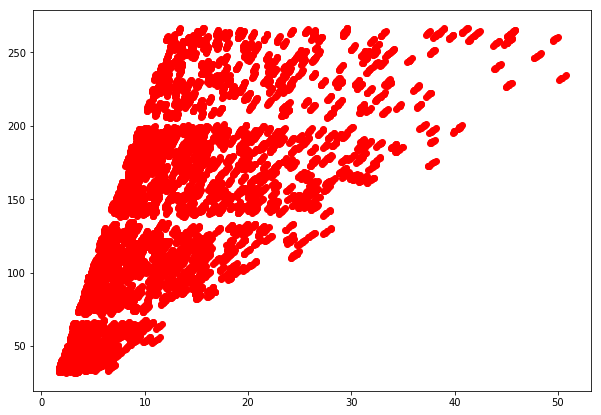

In [69]:
plt.figure(figsize=[10,7])
plt.scatter(combined["Price_Per_Unit"], combined["Item_MRP"], color = "red")

In [70]:
# Dropping the Columns
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Price_Per_Unit', 'Outlet_Age',
       'ItemType_Cat', 'Item_IDS'],
      dtype='object')

In [71]:
newdata = combined.drop(['Item_Identifier','Item_MRP','Item_Type','Outlet_Identifier',
       'Outlet_Establishment_Year',], axis = 1)

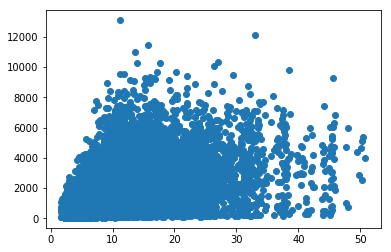

In [72]:
plt.scatter(newdata.Price_Per_Unit, newdata.Item_Outlet_Sales)

In [53]:
newdata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit,Outlet_Age,ItemType_Cat,Item_IDS
0,9.30,Low Fat,0.016047,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,14,Perishables,FD
1,5.92,Regular,0.019278,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,4,Non Perishables,DR
2,17.50,Low Fat,0.016760,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,14,Perishables,FD
3,19.20,Regular,0.022914,Medium,Tier 3,Grocery Store,732.3800,9.484115,15,Perishables,FD
4,8.93,Low Fat,0.013177,High,Tier 3,Supermarket Type1,994.7052,6.031512,26,Non Perishables,NC


In [52]:
print(newdata.shape)

(14204, 11)


In [108]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohe = OneHotEncoder(handle_unknown="ignore")
le= LabelEncoder()

In [84]:
newtrain = newdata[0:train.shape[0]]
newtest = newdata[8523:newdata.shape[0]]

In [114]:
objectdata = newtrain[newtrain.columns[newtrain.dtypes=="O"]]
objecttest = newtest[newtest.columns[newtest.dtypes=="O"]]

In [115]:
print(objectdata.columns)
print(objecttest.columns)


Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'ItemType_Cat', 'Item_IDS'],
      dtype='object')
Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'ItemType_Cat', 'Item_IDS'],
      dtype='object')


In [95]:
le.fit_transform(objectdata['Item_Fat_Content'])

array([0, 1, 0, ..., 0, 1, 0])

In [116]:
train_object = pd.DataFrame()
for i in objectdata.columns:
    train_object[i] = le.fit_transform(objectdata[i])

In [118]:
train_object.head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,ItemType_Cat,Item_IDS
0,0,1,0,1,1,1
1,1,1,2,2,0,0
2,0,1,0,1,1,1
3,1,1,2,0,1,1
4,0,0,2,1,0,2


In [119]:
test_object = pd.DataFrame()
for i in objecttest.columns:
    test_object[i] = le.fit_transform(objecttest[i])

In [120]:
test_object.head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,ItemType_Cat,Item_IDS
0,0,1,0,1,0,1
1,1,2,1,1,1,1
2,0,1,2,0,0,2
3,0,2,1,1,0,1
4,1,1,2,3,1,1


In [123]:
train_ohe = pd.DataFrame(ohe.fit_transform(train_object).todense())

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [125]:
test_ohe = pd.DataFrame(ohe.transform(test_object).todense())

In [74]:
# Applying OHE
dummydata = pd.get_dummies(newdata)

In [75]:
dummydata.head()

,Item_Weight,Item_Visibility,Item_Outlet_Sales,Price_Per_Unit,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ItemType_Cat_Non Perishables,ItemType_Cat_Perishables,Item_IDS_DR,Item_IDS_FD,Item_IDS_NC
0,9.30,0.016047,3735.1380,26.861204,14,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,5.92,0.019278,443.4228,8.153581,4,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,17.50,0.016760,2097.2700,8.092457,14,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,19.20,0.022914,732.3800,9.484115,15,0,1,0,1,0,...,1,1,0,0,0,0,1,0,1,0
4,8.93,0.013177,994.7052,6.031512,26,1,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1


In [76]:
# Split the Data in Train and Test
newtrain = dummydata[0:train.shape[0]]

In [77]:
# Test
newtest = dummydata[8523:dummydata.shape[0]]

In [138]:
newtest.drop("Item_Outlet_Sales",axis = 1, inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [139]:
print(newtrain.shape)
print(newtest.shape)

(8523, 22)
(5681, 21)


## Data Pre-Processing Stage

In [233]:
newtrain.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Outlet_Sales', 'Price_Per_Unit',
       'Outlet_Age', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'ItemType_Cat_Non Perishables',
       'ItemType_Cat_Perishables', 'Item_IDS_DR', 'Item_IDS_FD',
       'Item_IDS_NC'],
      dtype='object')

In [234]:
newtest.columns

Index(['Item_Weight', 'Item_Visibility', 'Price_Per_Unit', 'Outlet_Age',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'ItemType_Cat_Non Perishables',
       'ItemType_Cat_Perishables', 'Item_IDS_DR', 'Item_IDS_FD',
       'Item_IDS_NC'],
      dtype='object')

### Outlier Detection and Removal and then Model Building - Using newtrain set only.

1. First we will split the data in train and test and then we will use IQR to remove the outlier and create a model

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [171]:
onehottrain = pd.get_dummies(newtrain)

In [172]:
x = onehottrain.drop("Item_Outlet_Sales", axis = 1)
y = onehottrain.Item_Outlet_Sales

In [173]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [174]:
le1 = LinearRegression()
rf1 = RandomForestRegressor()

pred_lr = le1.fit(xtrain, ytrain).predict(xtest)
pred_rf3 = rf1.fit(xtrain,ytrain).predict(xtest)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [176]:
from sklearn.metrics import r2_score, mean_squared_error

cols = ['Model', 'RMSE', 'R-Squared']

# creating a empty dataframe of the colums
result = pd.DataFrame(columns = cols)

# compiling the required information
m = pd.Series({'Model': "Linreg Model without Outlier and Log Treatment ",
                     'RMSE':np.sqrt(mean_squared_error(ytest, pred_lr)),
                     'R-Squared': r2_score(ytest,pred_lr)})

m1 = pd.Series({'Model': "Random Forest without Outlier and Log Treatment",
                  'RMSE':np.sqrt(mean_squared_error(ytest, pred_rf3)),
                     'R-Squared': r2_score(ytest,pred_rf3)})

result.append([m, m1], ignore_index=True)

,Model,RMSE,R-Squared
0,Linreg Model without Outlier and Log Treatment,1219.285338,0.492064
1,Random Forest without Outlier and Log Treatment,1211.700203,0.498364


### Winsorization Method

This method involves setting the extreme values of an attribute to some specified value. For example, for a 90% Winsorization, the bottom 5% of values are set equal to the minimum value in the 5th percentile, while the upper 5% of values are set equal to the maximum value in the 95th percentile. This is more advanced than trimming where we just exclude the extreme values.

In [189]:
from scipy.stats.mstats import winsorize

In [204]:
onehottrain.select_dtypes(include = "float").columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Outlet_Sales', 'Price_Per_Unit',
       'Price_winsorized'],
      dtype='object')

In [205]:
onehottrain["Price_winsorized"] = winsorize(df_numeric_features['Price_Per_Unit'], 
                                            limits = [0.05,0.01])

onehottrain["Item_Visibility_winsorized"] = winsorize(df_numeric_features['Item_Visibility'], 
                                            limits = [0.05,0.01])

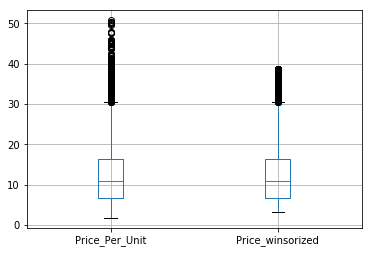

In [200]:
onehottrain.boxplot(column=["Price_Per_Unit", "Price_winsorized", ])

In [208]:
newohe = onehottrain.drop(['Price_Per_Unit','Item_Visibility'], axis = 1)

In [209]:
x = newohe.drop("Item_Outlet_Sales", axis = 1)
y = newohe.Item_Outlet_Sales

In [210]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [211]:
le1 = LinearRegression()
rf1 = RandomForestRegressor()

pred_lr = le1.fit(xtrain, ytrain).predict(xtest)
pred_rf3 = rf1.fit(xtrain,ytrain).predict(xtest)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [213]:
from sklearn.metrics import r2_score, mean_squared_error

cols = ['Model', 'RMSE', 'R-Squared']

# creating a empty dataframe of the colums
result = pd.DataFrame(columns = cols)

# compiling the required information
m = pd.Series({'Model': "Linreg Model Winsorized Model ",
                     'RMSE':np.sqrt(mean_squared_error(ytest, pred_lr)),
                     'R-Squared': r2_score(ytest,pred_lr)})

m1 = pd.Series({'Model': "Random Forest Winsorized Model",
                  'RMSE':np.sqrt(mean_squared_error(ytest, pred_rf3)),
                     'R-Squared': r2_score(ytest,pred_rf3)})

result.append([m, m1], ignore_index=True)

,Model,RMSE,R-Squared
0,Linreg Model Winsorized Model,1216.543560,0.494346
1,Random Forest Winsorized Model,1217.091311,0.493891


### IQR Method

In [108]:
df_numeric_features = newtrain.select_dtypes(include=[np.number])
df_numeric = newtest.select_dtypes(include=[np.number])

In [110]:
print(df_numeric_features.columns)
print(df_numeric.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_Outlet_Sales', 'Price_Per_Unit',
       'Outlet_Age'],
      dtype='object')
Index(['Item_Weight', 'Item_Visibility', 'Item_Outlet_Sales', 'Price_Per_Unit',
       'Outlet_Age'],
      dtype='object')


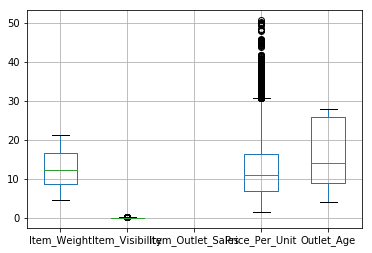

In [111]:
#plt.figure(figsize = [10,9])
df_numeric.boxplot(column=['Item_Weight', 'Item_Visibility', 'Item_Outlet_Sales', 'Price_Per_Unit',
       'Outlet_Age'])

# Sales, Price_Per_unit, Item Visibility

In [95]:
# drop target variable 
df_numeric_features = df_numeric_features.drop(['Item_Outlet_Sales'], axis=1)

# calculation of interquartile range
Q1 = df_numeric_features.quantile(0.25)
Q3 = df_numeric_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Item_Weight         8.065000
Item_Visibility     0.066546
Price_Per_Unit      9.521663
Outlet_Age         17.000000
dtype: float64


In [113]:
# calculation of interquartile range
df_numeric = df_numeric.drop(['Item_Outlet_Sales'], axis=1)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR_test = Q3 - Q1
print(IQR_test)

Item_Weight         8.085000
Item_Visibility     0.065505
Price_Per_Unit      9.513454
Outlet_Age         17.000000
dtype: float64


In [107]:
# remove the outliers from the dataframe
train_wtoutliers = newtrain[~((newtrain < (Q1 - 1.5 * IQR)) |(newtrain > (Q3 + 1.5 * IQR))).any(axis=1)]

In [114]:
test_wtoutliers =newtest[~((newtest<(Q1-1.5*IQR_test)) | (newtest>(Q3+1.5*IQR))).any(axis=1)]

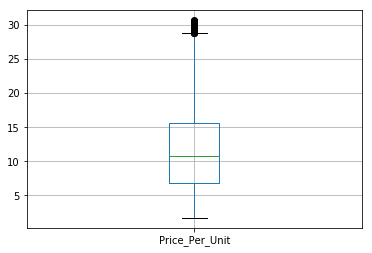

In [116]:
# plt.figure(figsize=[10,9])
test_wtoutliers.boxplot(column=['Price_Per_Unit'])

In [117]:
print(train.shape)
print(test.shape)
print(train_wtoutliers.shape)
print(test_wtoutliers.shape)

(8523, 12)
(5681, 11)
(8039, 11)
(5329, 11)


In [123]:
# Converting it into dummies
ohetrain = pd.get_dummies(train_wtoutliers)

In [124]:
ohetrain["Item_Outlet_Sales"] = np.log(ohetrain.Item_Outlet_Sales)

In [125]:
ohetrain.head()

,Item_Weight,Item_Visibility,Item_Outlet_Sales,Price_Per_Unit,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ItemType_Cat_Non Perishables,ItemType_Cat_Perishables,Item_IDS_DR,Item_IDS_FD,Item_IDS_NC
0,9.30,0.016047,8.225540,26.861204,14,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,5.92,0.019278,6.094524,8.153581,4,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,17.50,0.016760,7.648392,8.092457,14,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,19.20,0.022914,6.596300,9.484115,15,0,1,0,1,0,...,1,1,0,0,0,0,1,0,1,0
4,8.93,0.013177,6.902446,6.031512,26,1,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1


In [217]:
x = ohetrain.drop("Item_Outlet_Sales", axis = 1)
y = ohetrain.Item_Outlet_Sales

In [218]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [219]:
lr = LinearRegression()
rf = RandomForestRegressor()

In [220]:
pred = lr.fit(xtrain, ytrain).predict(xtest)
pred_rf = rf.fit(xtrain, ytrain).predict(xtest)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [221]:
from sklearn.metrics import r2_score, mean_squared_error

cols = ['Model', 'RMSE', 'R-Squared']

# creating a empty dataframe of the colums
result = pd.DataFrame(columns = cols)

# compiling the required information
model = pd.Series({'Model': "LR - IQR Outlier Removal & log of target",
                     'RMSE':np.sqrt(mean_squared_error(ytest, pred)),
                     'R-Squared': r2_score(ytest,pred)})

model2 = pd.Series({'Model': "RF - IQR Outlier Removal & log of target",
                  'RMSE':np.sqrt(mean_squared_error(ytest, pred_rf)),
                     'R-Squared': r2_score(ytest,pred_rf)})

In [222]:
result.append([model, model2], ignore_index=True)

,Model,RMSE,R-Squared
0,LR - IQR Outlier Removal & log of target,0.558347,0.682700
1,RF - IQR Outlier Removal & log of target,0.572529,0.666377


### Standard Deviation Method - Empirical Rule Method

1. Anything less than or more than 3 sigma is called an outlier

In [226]:
onehottrain.select_dtypes(include="float").columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Outlet_Sales', 'Price_Per_Unit',
       'Price_winsorized', 'Item_Visibility_winsorized'],
      dtype='object')

In [227]:
mean_visibility = onehottrain["Item_Visibility"].mean()
sd_visibility = onehottrain["Item_Visibility"].std()
lower_limit = mean_visibility - 3*sd_visibility
upper_limit = mean_visibility + 3*sd_visibility
onehottrain["Visibility_no_outliers"] = pd.Series(
                                    [min(max(values,lower_limit), upper_limit) 
                                     for values in onehottrain["Item_Visibility"]]
                                )

In [228]:
mean_price = onehottrain["Price_Per_Unit"].mean()
sd_price = onehottrain["Price_Per_Unit"].std()
lower_limit = mean_price - 3*sd_price
upper_limit = mean_price + 3*sd_price
onehottrain["Price_Per_Unit_no_outliers"] = pd.Series(
                                    [min(max(values,lower_limit), upper_limit) 
                                     for values in onehottrain["Price_Per_Unit"]]
                                )

In [230]:
onehottrain.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Outlet_Sales', 'Price_Per_Unit',
       'Outlet_Age', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'ItemType_Cat_Non Perishables',
       'ItemType_Cat_Perishables', 'Item_IDS_DR', 'Item_IDS_FD', 'Item_IDS_NC',
       'Price_winsorized', 'Item_Visibility_winsorized',
       'Visibility_no_outliers', 'Price_Per_Unit_no_outliers'],
      dtype='object')

In [231]:
sdtrain = onehottrain.drop(['Item_Visibility','Price_Per_Unit','Price_winsorized',
                           'Item_Visibility_winsorized'], axis = 1)

In [232]:
x = sdtrain.drop("Item_Outlet_Sales", axis = 1)
y = sdtrain.Item_Outlet_Sales

In [233]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [234]:
lr = LinearRegression()
rf = RandomForestRegressor()

In [235]:
pred = lr.fit(xtrain, ytrain).predict(xtest)
pred_rf = rf.fit(xtrain, ytrain).predict(xtest)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [236]:
from sklearn.metrics import r2_score, mean_squared_error

cols = ['Model', 'RMSE', 'R-Squared']

# creating a empty dataframe of the colums
result = pd.DataFrame(columns = cols)

# compiling the required information
model = pd.Series({'Model': "LR - IQR Outlier Removal & log of target",
                     'RMSE':np.sqrt(mean_squared_error(ytest, pred)),
                     'R-Squared': r2_score(ytest,pred)})

model2 = pd.Series({'Model': "RF - IQR Outlier Removal & log of target",
                  'RMSE':np.sqrt(mean_squared_error(ytest, pred_rf)),
                     'R-Squared': r2_score(ytest,pred_rf)})

In [237]:
result.append([model, model2], ignore_index=True)

,Model,RMSE,R-Squared
0,LR - IQR Outlier Removal & log of target,1211.522298,0.498512
1,RF - IQR Outlier Removal & log of target,1216.147402,0.494675


In [238]:
# Scaling the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [240]:
scaled_train = pd.DataFrame(sc.fit_transform(xtrain), columns = xtrain.columns)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [241]:
scaled_test = pd.DataFrame(sc.transform(xtest), columns = xtest.columns)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [245]:
lr = LinearRegression()
rf = RandomForestRegressor()
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
pred = lr.fit(scaled_train, ytrain).predict(scaled_test)
pred_rf = rf.fit(scaled_train, ytrain).predict(scaled_test)
pred_gbm = gbm.fit(scaled_train, ytrain).predict(scaled_test)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [247]:
from sklearn.metrics import r2_score, mean_squared_error

cols = ['Model', 'RMSE', 'R-Squared']

# creating a empty dataframe of the colums
result = pd.DataFrame(columns = cols)

# compiling the required information
model = pd.Series({'Model': "LR - Z Score Outlier Removal",
                     'RMSE':np.sqrt(mean_squared_error(ytest, pred)),
                     'R-Squared': r2_score(ytest,pred)})

model2 = pd.Series({'Model': "RF - Z Score Outlier Removal ",
                  'RMSE':np.sqrt(mean_squared_error(ytest, pred_rf)),
                     'R-Squared': r2_score(ytest,pred_rf)})

model3 = pd.Series({'Model': "GBM - Z Score Outlier Removal ",
                  'RMSE':np.sqrt(mean_squared_error(ytest, pred_gbm)),
                     'R-Squared': r2_score(ytest,pred_gbm)})

In [248]:
result.append([model, model2, model3], ignore_index=True)

,Model,RMSE,R-Squared
0,LR - Z Score Outlier Removal,1211.522298,0.498512
1,RF - Z Score Outlier Removal,1221.480113,0.490234
2,GBM - Z Score Outlier Removal,1105.263211,0.582622


In [72]:
from xgboost import XGBRegressor
xg = XGBRegressor(max_depth=4)

In [75]:
xg.fit(data_feature, newtrain.Item_Outlet_Sales)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [76]:
pred_XG = xg.predict(test_feature)
# Submit on AV
solution = pd.DataFrame({"Item_Identifier":test["Item_Identifier"],
                        "Outlet_Identifier":test["Outlet_Identifier"],
                        "Item_Outlet_Sales":pred_XG})



In [78]:
solution.to_csv("XGB BigSales Mart MODEL.csv", index = False) # 1165.49

In [79]:
gbm.fit(data_feature, newtrain.Item_Outlet_Sales)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
pred_gbm = gbm.predict(test_feature)
# Submit on AV
solution = pd.DataFrame({"Item_Identifier":test["Item_Identifier"],
                        "Outlet_Identifier":test["Outlet_Identifier"],
                        "Item_Outlet_Sales":pred_gbm})

In [81]:
solution.to_csv("GBM BigSales Mart MODEL.csv", index = False) # 1161.947482309252.

In [93]:
# Chi Square Test
import scipy.stats as stats

In [96]:
newdata.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Price_Per_Unit', 'Outlet_Age', 'ItemType_Cat', 'Item_IDS'],
      dtype='object')

In [102]:
pd.DataFrame(newdata.groupby('Outlet_Size')['ItemType_Cat'].value_counts()).T

Outlet_Size             High                      Medium              \
ItemType_Cat Non Perishables Perishables Non Perishables Perishables   
ItemType_Cat            1054         499            3782        1798   

Outlet_Size            Small              
ItemType_Cat Non Perishables Perishables  
ItemType_Cat            4792        2279

H0: Both the Variables/Columns are Independent
H1: Both the Variables are associated


In [104]:
chi_sq_Stat, p_value, 
deg_freedom, exp_freq = stats.chi2_contingency(np.array([[1054,499],[3782,1798],[4792,2279]]))

In [105]:
p_value

0.9970794846503382